<h1>1. Prepare dataframes</h1>

Import libraries

In [11]:
import pandas as pd
import os

Prepare Renan's dataframe

In [12]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)          

Prepare Claudinei's dataframe

In [13]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    

Prepare Guilherme's dataframe

In [14]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge dataframes

In [15]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3324,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3325,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme


<h1>2. Training</h1>

<h3>2.1 Neural network</h3>

Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Preparation for training

In [17]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3324,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3325,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y = groupDataframe.iloc[:,180]
Y

0       A
1       A
2       A
3       A
4       A
       ..
3322    O
3323    O
3324    O
3325    O
3326    O
Name: Target letter, Length: 3327, dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<h3>Training</h3>

In [20]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf.fit(X_train, np.ravel(y_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 3), max_iter=5000,
              random_state=1, solver='lbfgs')

Testing

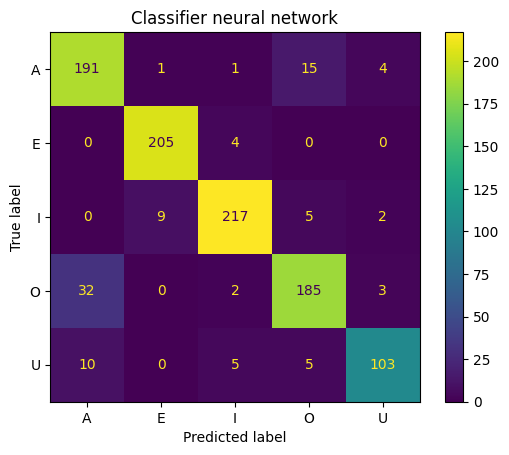

In [21]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Classifier neural network')
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.82      0.90      0.86       212
           E       0.95      0.98      0.97       209
           I       0.95      0.93      0.94       233
           O       0.88      0.83      0.86       222
           U       0.92      0.84      0.88       123

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999



<h3>2.2 KNN classifier</h3>

Import libraries

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Creating classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

Convert dataframes to string

In [25]:
df_string = groupDataframe.applymap(str)

Find best neighbors number

In [26]:
k_list = list(range(1,333))
parameters = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid.fit(df_string.drop('Target letter',axis=1),df_string['Target letter'])
results = grid.cv_results_
print(grid.best_params_, grid.best_score_)

c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

ValueError: 
All the 1660 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1660 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py", line 407, in _fit
    X, y = self._validate_data(
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\guipa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Renan'
